## Import Relevant Libraries

In [56]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import glob
import matplotlib.pyplot as plt


## Path to images and image mask

In [16]:
imageDir = '/home/beltus/image/Computer_Vision/Plant_Classification/dataset/images'
maskDir = '/home/beltus/image/Computer_Vision/Plant_Classification/dataset/masks'
imagePaths = sorted(glob.glob(imageDir + "/*.png"))
maskPaths = sorted(glob.glob(maskDir + "/*.png"))

print("Number of Flower Images in our Dataset", len(maskPaths))
print("Number of Flower Mask in our Dataset", len(maskPaths))

Number of Flower Images in our Dataset 234
Number of Flower Mask in our Dataset 234


## Feature Description and Extraction

In [15]:
def extract(image , mask , bins):
    
    #extract histogram features from image
    hist = cv2.calcHist([image], [0,1,2] , mask , bins , [0, 256, 0 , 256, 0 , 256])
    
    #normalize the features
    hist = cv2.normalize(hist, hist)
    
    #convert and return extracted features as a vector
    return hist.flatten()


bins = [8,8,8]

#list to hold all the extracted features from the dataset of flowers
feature_list = []

##List of the different flower class names
target = []

for (imagePath , maskPath) in zip(imagePaths, maskPaths):
    
    #read image with corresponding path
    image = cv2.imread(imagePath)
    mask = cv2.imread(maskPath)
    
    #convert mask to grayscale
    maskGray = cv2.cvtColor(mask , cv2.COLOR_BGR2GRAY)
    #Extract features from the image region specified by the mask using the RGB Histogram descriptor
    histFeatures = extract(image, maskGray , bins)
    
    feature_list.append(histFeatures)
    
    ##extract the flower class name from image path and appended to list
    target.append(imagePath.split('_')[-2])
    
#get unique flower names-class names from the target list 
targetSpecies = np.unique(target)

In [19]:
print(len(targetSpecies))
print(len(feature_list))

4
234


## Transform Target Names - Label Encoder


In [24]:
## Transform Target Names - Label Encoder
from sklearn.preprocessing import LabelEncoder

#initialize the encoder class
label_encoder = LabelEncoder()

#convert string names to integers
transformed_targets = label_encoder.fit_transform(target)

## Split of Dataset - Cross Validation Approach

In [25]:
from sklearn.model_selection import train_test_split
(trainInput, testInput , trainOut, testOut) = train_test_split(feature_list, transformed_targets , test_size = 0.3, random_state = 42)

## Train Model - Random Forest Classifier

In [26]:
#initialize Random Forest Classifier
model = RandomForestClassifier(n_estimators = 25, random_state = 84)

#train the model
model.fit(trainInput, trainOut)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=84, verbose=0,
                       warm_start=False)

## Model Prediction - Flower Species Prediction

In [27]:
predict = model.predict(testInput)

In [29]:
# Classification Report
print(classification_report(testOut , predict , target_names = targetSpecies))

              precision    recall  f1-score   support

      crocus       0.92      1.00      0.96        12
       daisy       0.88      0.93      0.90        15
       pansy       1.00      0.85      0.92        20
   sunflower       0.96      1.00      0.98        24

    accuracy                           0.94        71
   macro avg       0.94      0.95      0.94        71
weighted avg       0.95      0.94      0.94        71



## Prediction on Random Images of Dataset

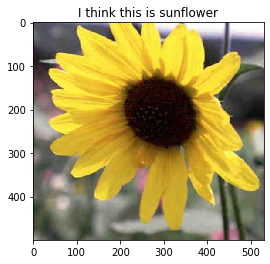

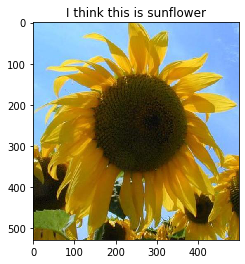

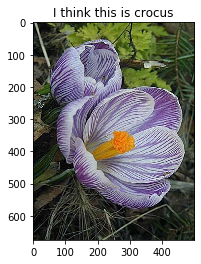

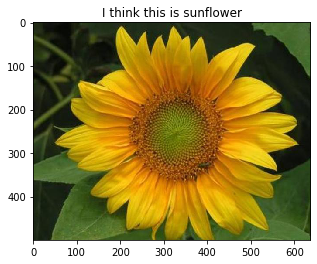

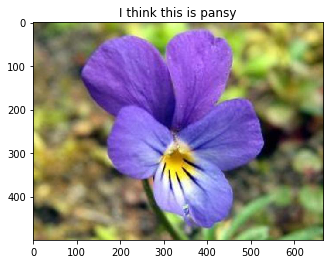

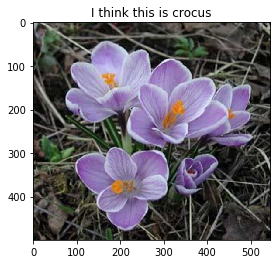

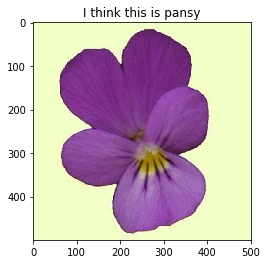

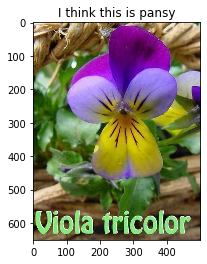

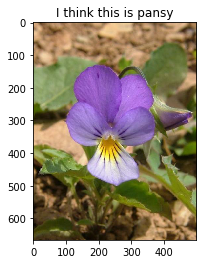

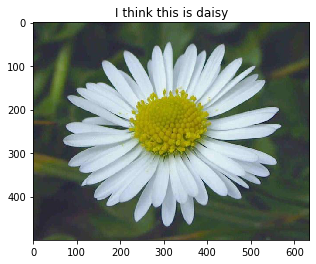

In [55]:
######## FURTHER EXAMINATION OF THE MODEL OUTPUT AND PERFORMANCE
#randomly pick 10 image paths one by one from the data and test with model
for i in np.random.choice(np.arange(0 , len(imagePaths)), 10): ##np.arange(0 , n) returns an array of integers from 0 to n 
    ##np.random.choice(array , n) takes array of inputs and outputs an array containing n number of random elements in the array
    image = cv2.imread(imagePaths[i])
    mask = cv2.imread(maskPaths[i])
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    
    #extract features from the image
    features = extract(image  , mask , bins)

    #Predict Flower species
    predict = model.predict([features])

    # Gets the Names of the Flower Species using the LabelEncoder.inverse_transform() fucntion
    predicted_flower = label_encoder.inverse_transform(predict)[0]
    
    flower_name = imagePaths[i].split('_')[-2]
    
    plt.figure(), plt.title("I think this is " + predicted_flower), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))    

 #   cv2.imshow("name" , image)

    #plt.figure(), plt.imshow(im)
        
    #print()
    
    #if flower_name == predicted_flower:
       #print("YES!! You're Correct")
    
        
   # else:
        #print("Sorry,That is wrong, It is a" + flower_name)
    
    

    #Print Results

 #   print(imagePaths[i]) # print the image path


## Prediction on Random Images from Internet